In [6]:
import src.preprocessing.load_csv as load_csv
import src.preprocessing.plot_data as plot_data
import src.preprocessing.preprocessing_run as preprocessing_run
import src.models.T2_model as T2_model
import src.evaluation.predict as predict
import src.preprocessing.tools as tools
import src.preprocessing.kowalski as kowalski
import src.evaluation.plot_evaluation as plot_evaluation
import src.preprocessing.gaussian_process as gp

import importlib
import numpy as np
import pandas as pd

importlib.reload(load_csv)
importlib.reload(plot_data)
importlib.reload(preprocessing_run)
importlib.reload(T2_model)
importlib.reload(predict)
importlib.reload(tools)
importlib.reload(kowalski)
importlib.reload(plot_evaluation)
importlib.reload(gp)

<module 'src.preprocessing.gaussian_process' from '/home/theob/Documents/stage/ML_skyportal/src/preprocessing/gaussian_process.py'>

In [138]:
path = '=data_kowalski/'
kowalski.get_data_from_kowalski(all=True, nb_obj=500, dataDir=path)

Connected to Kowalski
Total number of objects: 14153
0 ZTF17aaaeqms 0.0
1 ZTF17aaajowi 7.065639793683318e-05
2 ZTF17aaanztg 0.00014131279587366636
3 ZTF17aaaocnx 0.00021196919381049955
4 ZTF17aaaptxx 0.0002826255917473327
5 ZTF17aaapufz 0.0003532819896841659
6 ZTF17aaazdba 0.0004239383876209991
7 ZTF17aabgaoo 0.0004945947855578322
8 ZTF17aabhmby 0.0005652511834946654
9 ZTF17aabtvsy 0.0006359075814314987
10 ZTF17aabwkio 0.0007065639793683318
11 ZTF17aacldgo 0.000777220377305165
12 ZTF17aacpbmv 0.0008478767752419982
13 ZTF17aacxacr 0.0009185331731788313
14 ZTF17aadlxmv 0.0009891895711156644
15 ZTF18aaaecnk 0.0010598459690524978
16 ZTF18aaaehwv 0.0011305023669893309
17 ZTF18aaahyvk 0.001201158764926164
18 ZTF18aaaibml 0.0012718151628629973
19 ZTF18aaajljy 0.0013424715607998304
20 ZTF18aaanaev 0.0014131279587366635
21 ZTF18aaaonon 0.0014837843566734969
22 ZTF18aaaqbhp 0.00155444075461033
23 ZTF18aaaqexr 0.001625097152547163
24 ZTF18aaaqgyc 0.0016957535504839964
25 ZTF18aabcgyb 0.0017664099

KeyboardInterrupt: 

# Load data

In [7]:
bts_df = load_csv.load_BTS_data('data/BTS.csv')
bts_df = bts_df[['objectId', 'type']]
bts_df

,objectId,type
0,ZTF17aaaeqms,-
1,ZTF17aaajowi,-
2,ZTF17aaanztg,-
3,ZTF17aaaocnx,-
4,ZTF17aaaptxx,-
...,...,...
14148,ZTF24aaguphd,-
14149,ZTF24aagwfly,-
14150,ZTF24aagwwkr,-
14151,ZTF24aagzzye,-


In [8]:
bts_df[bts_df['objectId'] == 'ZTF18aayiono']

,objectId,type
398,ZTF18aayiono,SN Ia


In [14]:
import os
path = 'data_kowalski/'
objIds = os.listdir(path)

photo_df, object_alerts = kowalski.load_kowalski_data(objIds[1], path)

# Get one Object

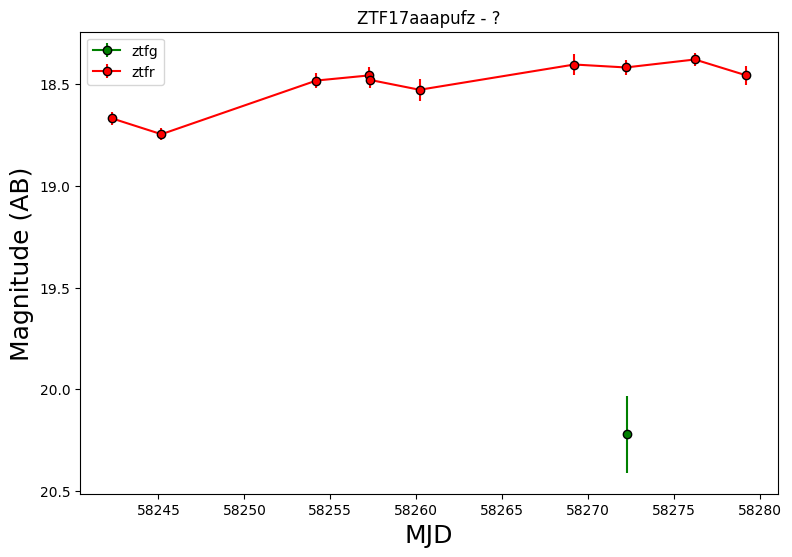

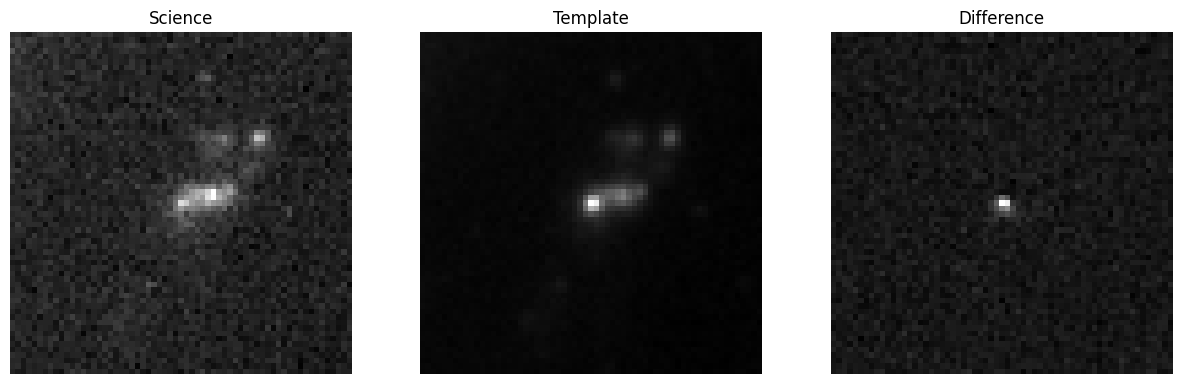

         obj_id  sgscore1  sgscore2  distpsnr1  distpsnr2  fwhm     magpsf  \
0  ZTF17aaapufz   0.06775       0.5   0.163545   0.933447  2.28  18.497599   

   sigmapsf          ra        dec  diffmaglim  ndethist  nmtchps  ncovhist  \
0  0.040777  188.967838  27.932036   20.597931        91       19       132   

   sharpnr      scorr      sky  
0    0.173  27.777838 -0.16213  


In [15]:
one_photo, one_metadata, one_image, index = kowalski.get_data(photo_df, object_alerts, index=100)
plot_data.plot_all(one_photo, one_metadata, one_image)

In [123]:
one_photo

,obj_id,mjd,mag,magerr,snr,limiting_mag,filter,type,jd
0,ZTF17aaazdba,58205.15596,16.023001,0.012,90.478016,23.9,ztfg,?,2.458206e+06
1,ZTF17aaazdba,58206.16989,16.139999,0.012,90.478016,23.9,ztfg,?,2.458207e+06
2,ZTF17aaazdba,58206.25484,16.136000,0.012,90.478016,23.9,ztfg,?,2.458207e+06
3,ZTF17aaazdba,58210.19764,16.087000,0.012,90.478016,23.9,ztfg,?,2.458211e+06
4,ZTF17aaazdba,58210.25621,16.118000,0.012,90.478016,23.9,ztfg,?,2.458211e+06
...,...,...,...,...,...,...,...,...,...
414,ZTF17aaazdba,58788.50557,15.964000,0.011,98.703292,23.9,ztfg,?,2.458789e+06
415,ZTF17aaazdba,58788.50602,15.974000,0.012,90.478016,23.9,ztfg,?,2.458789e+06
416,ZTF17aaazdba,58788.52622,15.655000,0.011,98.703292,23.9,ztfr,?,2.458789e+06
417,ZTF17aaazdba,58788.52667,15.620000,0.010,108.573623,23.9,ztfr,?,2.458789e+06


# Preprocessing

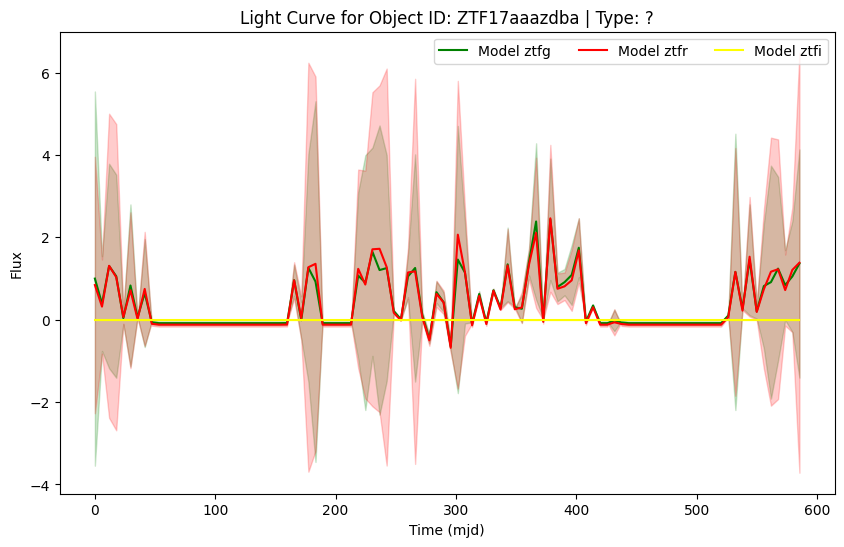

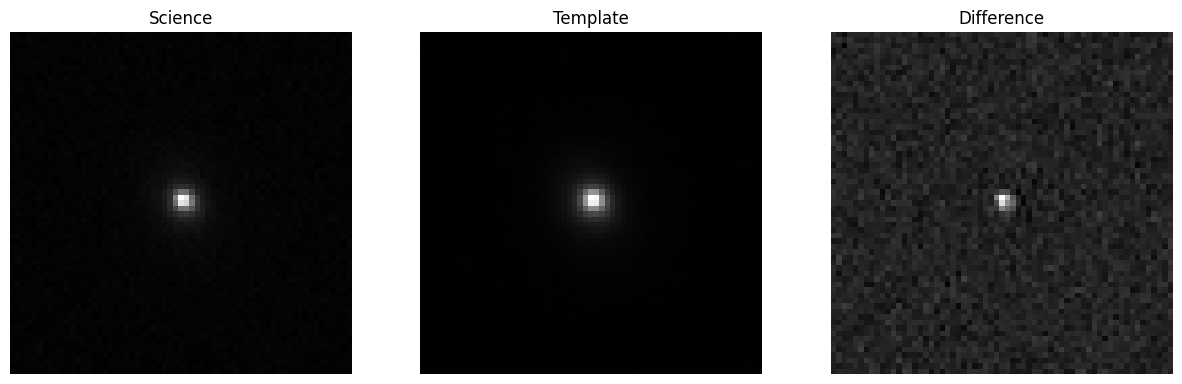

In [133]:
photo_ready, cand_ready, image_ready = preprocessing_run.process_data(one_photo, one_metadata, one_image, verbose=True)

# Load model

In [67]:
from tensorflow.keras.optimizers import Adam

num_filters = 64
num_classes = 2
num_layers = 1
d_model = 64
num_heads = 16
dff = 128
rate = 0.5

shapes = [(100, 4), (16,), (63, 63, 3)]

# Initialize the T2Model with the proper configuration
model_step1 = T2_model.T2Model(num_filters=num_filters, num_classes=num_classes, num_layers=num_layers,
                d_model=d_model, num_heads=num_heads, dff=dff, input_shapes=shapes, 
                rate=rate)

# Compile the model
model_step1.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Creating the final model instance
model_step1.build(input_shapes=shapes)

# Print the model summary
model_step1.summary()

model_step1.load_weights('checkpoints/step_1.weights.h5')

Model: "t2_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ multimodal_model_2              │ (None, 1)              │       226,673 │
│ (MultimodalModel)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_embedding_2                │ (None, 100, 64)        │           832 │
│ (ConvEmbedding)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_encoding_2           │ (None, 100, 64)        │             0 │
│ (PositionalEncoding)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 100, 64)        │        33,472 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_5 (Concatenate)     │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,109 (1019.96 KB)

 Trainable params: 261,077 (1019.83 KB)

 Non-trainable params: 32 (128.00 B)

/home/theob/anaconda3/envs/ml_skyportal_env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 



In [68]:
final_data = predict.predict_classes(photo_ready, cand_ready, image_ready)

In [69]:
print(final_data[0].shape, final_data[1].shape, final_data[2].shape)

(1, 100, 4) (1, 16) (1, 63, 63, 3)


# Predict and display

In [70]:
y_pred, y_pred_classes = predict.predict_T2(final_data, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


In [71]:
types = ['Other', 'SN']

print(f'The object is a {types[y_pred_classes[0]]} with a probability of {y_pred[0][y_pred_classes[0]]:.2f}')

The object is a SN with a probability of 0.77


# Loop

In [79]:
def merge_filter_counts(dict_list):
    merged_dict = {}
    for d in dict_list:
        merged_dict.update(d)
    return merged_dict

def count_points_by_filter(df, alert_num):
    count_df = df.groupby(['filter']).size().reindex(['ztfr', 'ztfg', 'ztfi'], fill_value=0)
    return {alert_num: count_df.to_dict()}

In [72]:
from tqdm import tqdm

def prepare_all_data(photo_df, object_alerts, nb_max=None):
    df_photometry = pd.DataFrame()
    df_metadata = pd.DataFrame()
    all_images = []

    counts_dict = {}
    
    index = 0
    max_index = nb_max if nb_max is not None else len(object_alerts)
    
    shape_image_expected = (63, 63, 3)
    with tqdm(total=max_index, desc="Processing alerts") as pbar:
        while index < max_index:
            one_photo, one_metadata, one_image, index = kowalski.get_data(photo_df, object_alerts, index=index)

            nb_filter = count_points_by_filter(one_photo, index)
            counts_dict = merge_filter_counts([counts_dict, nb_filter])

            if one_image.shape == shape_image_expected:
                photo_ready, cand_ready, image_ready = preprocessing_run.process_data(one_photo, one_metadata, one_image, verbose=False)
            
                photo_ready['obj_id'] = index
                cand_ready['obj_id'] = index

                df_photometry = pd.concat([df_photometry, photo_ready], ignore_index=True)
                df_metadata = pd.concat([df_metadata, cand_ready], ignore_index=True)
                all_images.append(image_ready)

            index += 1
            pbar.update(1)
    
    all_images = np.concatenate(all_images, axis=0)
    
    return df_photometry, df_metadata, all_images, counts_dict

In [73]:
def predict_all(photo_df, object_alerts, model, nb_max=None, types=['type 1', 'type 2']):

    all_photometry, all_metadata, all_images, counts_dict = prepare_all_data(photo_df, object_alerts, nb_max=nb_max)

    final_data = predict.predict_classes(all_photometry, all_metadata, all_images)
    
    y_pred, y_pred_classes = predict.predict_T2(final_data, model)

    df_results = pd.DataFrame(y_pred, columns=['type_1', 'type_2'])
    df_results['prediction'] = y_pred_classes
    df_results['alertes'] = all_photometry['obj_id'].unique()
    df_results = df_results[['alertes', 'type_1', 'type_2', 'prediction']]
    
    plot_evaluation.plot_interactive_supernova_classification(df_results, types=types, counts_dict=counts_dict)

    count_type_1 = df_results['prediction'].value_counts()[0]
    count_type_2 = df_results['prediction'].value_counts()[1]
    print(f'Type 1: {count_type_1}, Type 2: {count_type_2}')
    
    if count_type_1 == count_type_2:
        print(f'Equal number of type 1 and type 2')
    else:
        print(f'The object is a {types[df_results["prediction"].value_counts().idxmax()]}')

    type_1 = df_results['type_1'].sum()
    type_2 = df_results['type_2'].sum()

    print(f'Type 1: {type_1}, Type 2: {type_2}')
    
    final_prediction = types[0] if type_1 > type_2 else types[1]
    print(f'Final prediction: {final_prediction}')

    
    return df_results, counts_dict

In [74]:
import os
objIds = os.listdir(path)
print(objIds)

['ZTF18aayiahw', 'ZTF18aayidfz', 'ZTF18aayiono', 'ZTF18aayivoq', 'ZTF18aayivxm', 'ZTF18aayjflv', 'ZTF18aayjvve', 'ZTF18aayjyub', 'ZTF18aaykjei', 'ZTF18aaykmzg', 'ZTF18aaylbjm', 'ZTF18aaylcvo', 'ZTF18aaypxlu', 'ZTF18aaytovs', 'ZTF18aayxupv', 'ZTF18aayyqia', 'ZTF18aayyxxp', 'ZTF18aazabmh', 'ZTF18aazblzy', 'ZTF18aazcoob', 'ZTF18aazgfkq', 'ZTF18aazhklh', 'ZTF17aaaeqms', 'ZTF17aaajowi', 'ZTF17aaanztg', 'ZTF17aaaocnx', 'ZTF17aaaptxx', 'ZTF17aaapufz', 'ZTF17aaazdba', 'ZTF17aabgaoo', 'ZTF17aabhmby', 'ZTF17aabtvsy', 'ZTF17aabwkio', 'ZTF17aacldgo', 'ZTF17aacpbmv', 'ZTF17aacxacr', 'ZTF17aadlxmv', 'ZTF18aaaecnk', 'ZTF18aaaehwv', 'ZTF18aaaibml', 'ZTF18aaajljy', 'ZTF18aaanaev', 'ZTF18aaaonon', 'ZTF18aaaqbhp', 'ZTF18aaaqexr', 'ZTF18aaaqgyc', 'ZTF18aabcgyb', 'ZTF18aabdajx', 'ZTF18aabdgik', 'ZTF18aabdjmb', 'ZTF18aabedfq', 'ZTF18aabezhk', 'ZTF18aabgroi', 'ZTF18aabiwhf', 'ZTF18aabkvpi', 'ZTF18aabssth', 'ZTF18aabtxvd', 'ZTF18aabuoud', 'ZTF18aabuoxd', 'ZTF18aabutpp', 'ZTF18aabxlsv', 'ZTF18aabxyys', 'ZTF18a

In [75]:
len(objIds)

418

In [24]:
# type de l'obj dans bts_df
nb_id = 42
bts_df[bts_df['objectId'] == objIds[nb_id]]['type'].values[0]

'SN Ia'

In [25]:
photo_df, object_alerts = kowalski.load_kowalski_data(objIds[nb_id], path)
len(object_alerts)

14

In [26]:
counts = count_points_by_filter(photo_df, 100)
if all(counts[filter] < 3 for filter in counts):
    print(f"No filter has at least 3 points for object {objIds[nb_id]}. Skipping.")

TypeError: '<' not supported between instances of 'dict' and 'int'

In [27]:
count_points_by_filter(photo_df, 100)

{100: {'ztfr': 11, 'ztfg': 17, 'ztfi': 0}}

In [80]:
df_result, counts_dict = predict_all(photo_df, object_alerts, model, nb_max=len(object_alerts), types=['Other', 'SN'])

Processing alerts:   4%|▎         | 34/965 [00:03<01:46,  8.75it/s]


KeyboardInterrupt: 

In [29]:
def has_valid_filter(counts_dict):
    for obj_id, filters in counts_dict.items():
        if any(count >= 3 for count in filters.values()):
            return True
    return False

In [78]:
# test has_valid_filter

counts = count_points_by_filter(photo_df, 100)
print(counts)
if not has_valid_filter(counts):
    print(f"At least one filter has at least 3 points for object {objIds[nb_id]}.")

TypeError: count_points_by_filter() takes 1 positional argument but 2 were given

In [116]:
def loop_on_all(objIds, model_step1, model_step2, model_step3a, model_step3b):

    df_res = pd.DataFrame(columns=['objectId', 'true_class', 'nb_predictions_type_1', 'nb_predictions_type_2', 'nb_type_1', 'nb_type_2', 'final_prediction_by_counts', 'final_prediction_by_sum'])

    types = ['Other', 'SN']

    for nb_id in range(30):
        try:
            photo_df, object_alerts = kowalski.load_kowalski_data(objIds[nb_id], path)

            if photo_df is None:
                continue

            nb_max = len(object_alerts) if len(object_alerts) < 301 else 301

            counts = count_points_by_filter(photo_df, nb_max)

            if not has_valid_filter(counts):
                continue

            true_class = bts_df[bts_df['objectId'] == objIds[nb_id]]['type'].values[0]

            print(f'True class: {true_class}')
            df_result, counts_dict = predict_all(photo_df, object_alerts, model, nb_max=nb_max, types=types)

            res = -1
            # si prediction d'un type est superieur à 60% de l'autre type alors on prend cette prediction
            if df_result['type_1'].sum() > 0.6 * df_result['type_2'].sum():
                res = 0
            elif df_result['type_2'].sum() > 0.6 * df_result['type_1'].sum():
                res = 1

            # si type 2 on passe à la suite


            df_temp = pd.DataFrame({
                'objectId': [objIds[nb_id]],
                'true_class': [true_class],
                'nb_predictions_type_1': [df_result['prediction'].value_counts().get(0, 0)],
                'nb_predictions_type_2': [df_result['prediction'].value_counts().get(1, 0)],
                'nb_type_1': [df_result['type_1'].sum()],
                'nb_type_2': [df_result['type_2'].sum()],
                'last_type_1_prediction': [df_result['type_1'].iloc[-1]],
                'last_type_2_prediction': [df_result['type_2'].iloc[-1]]
            })

            df_temp['final_prediction_by_counts'] = types[df_result['prediction'].value_counts().idxmax()] if not df_result['prediction'].value_counts().empty else None
            df_temp['final_prediction_by_sum'] = types[0] if df_temp['nb_type_1'][0] > df_temp['nb_type_2'][0] else types[1]

            print(df_temp)

            df_res = pd.concat([df_res, df_temp], ignore_index=True)

        except Exception as e:
            print(f"Error processing object {objIds[nb_id]}: {e}")
            continue

    return df_res

In [39]:
objDirectory = os.path.join(path, 'ZTF18aadvifa')

photo_df = pd.read_json(os.path.join(objDirectory, 'photometry.json'))

In [40]:
photo_df

""


In [117]:
df_res = loop_on_all(objIds, model)

True class: SN Ia


Processing alerts:  88%|████████▊ | 23/26 [00:02<00:00, 10.00it/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Type 1: 13, Type 2: 10
The object is a Other
Type 1: 13.602295875549316, Type 2: 9.222003936767578
Final prediction: Other
       objectId true_class  nb_predictions_type_1  nb_predictions_type_2  \
0  ZTF18aayiono      SN Ia                     13                     10   

   nb_type_1  nb_type_2  last_type_1_prediction  last_type_2_prediction  \
0  13.602296   9.222004                 0.02978                0.960375   

  final_prediction_by_counts final_prediction_by_sum  
0                      Other                   Other  
Error processing object ZTF18aazhklh: [Errno 2] No such file or directory: '/media/theob/E/ML_project_data/data_kowalski/ZTF18aazhklh/alerts.npy'
True class: -


Processing alerts:  98%|█████████▊| 97/99 [00:20<00:00,  4.69it/s]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 


Type 1: 69, Type 2: 28
The object is a Other
Type 1: 62.440635681152344, Type 2: 34.27981185913086
Final prediction: Other
       objectId true_class  nb_predictions_type_1  nb_predictions_type_2  \
0  ZTF17aaaeqms          -                     69                     28   

   nb_type_1  nb_type_2  last_type_1_prediction  last_type_2_prediction  \
0  62.440636  34.279812                0.389433                0.567659   

  final_prediction_by_counts final_prediction_by_sum  
0                      Other                   Other  
True class: -


Processing alerts:   7%|▋         | 2/27 [00:00<00:01, 14.13it/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Type 1: 1, Type 2: 1
Equal number of type 1 and type 2
Type 1: 1.0403093099594116, Type 2: 0.9532101154327393
Final prediction: Other
       objectId true_class  nb_predictions_type_1  nb_predictions_type_2  \
0  ZTF17aaajowi          -                      1                      1   

   nb_type_1  nb_type_2  last_type_1_prediction  last_type_2_prediction  \
0   1.040309    0.95321                0.689461                0.306375   

  final_prediction_by_counts final_prediction_by_sum  
0                         SN                   Other  
True class: -


Processing alerts:  97%|█████████▋| 34/35 [00:04<00:00,  8.49it/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


Error processing object ZTF17aaanztg: 1
True class: -


Processing alerts:  71%|███████   | 32/45 [00:04<00:01,  7.75it/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Type 1: 17, Type 2: 15
The object is a Other
Type 1: 19.29237937927246, Type 2: 12.960378646850586
Final prediction: Other
       objectId true_class  nb_predictions_type_1  nb_predictions_type_2  \
0  ZTF17aaaocnx          -                     17                     15   

   nb_type_1  nb_type_2  last_type_1_prediction  last_type_2_prediction  \
0  19.292379  12.960379                 0.11908                0.899307   

  final_prediction_by_counts final_prediction_by_sum  
0                      Other                   Other  
True class: -


Processing alerts:   0%|          | 0/2 [00:00<?, ?it/s]

No valid index found in photometry for the given object_alerts
Error processing object ZTF17aaaptxx: 'NoneType' object has no attribute 'groupby'


True class: LBV


Processing alerts:  76%|███████▋  | 230/301 [00:48<00:14,  4.78it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


Type 1: 22, Type 2: 206
The object is a SN
Type 1: 60.955528259277344, Type 2: 158.77099609375
Final prediction: SN
       objectId true_class  nb_predictions_type_1  nb_predictions_type_2  \
0  ZTF17aaapufz        LBV                     22                    206   

   nb_type_1   nb_type_2  last_type_1_prediction  last_type_2_prediction  \
0  60.955528  158.770996                0.155604                0.808011   

  final_prediction_by_counts final_prediction_by_sum  
0                         SN                      SN  
True class: TDE


Processing alerts:  90%|█████████ | 189/210 [04:07<01:09,  3.32s/it]

GP fit failed for ZTF17aaazdba! Using guessed GP parameters.


Processing alerts:  90%|█████████ | 190/210 [04:49<05:03, 15.17s/it]

GP fit failed for ZTF17aaazdba! Using guessed GP parameters.


Processing alerts: 100%|██████████| 210/210 [10:20<00:00,  2.96s/it]


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step


Type 1: 42, Type 2: 167
The object is a SN
Type 1: 57.694580078125, Type 2: 143.1429443359375
Final prediction: SN
       objectId true_class  nb_predictions_type_1  nb_predictions_type_2  \
0  ZTF17aaazdba        TDE                     42                    167   

   nb_type_1   nb_type_2  last_type_1_prediction  last_type_2_prediction  \
0   57.69458  143.142944                0.150989                0.839247   

  final_prediction_by_counts final_prediction_by_sum  
0                         SN                      SN  


In [118]:
df_res

,objectId,true_class,nb_predictions_type_1,nb_predictions_type_2,nb_type_1,nb_type_2,final_prediction_by_counts,final_prediction_by_sum,last_type_1_prediction,last_type_2_prediction
0,ZTF18aayiono,SN Ia,13,10,13.602296,9.222004,Other,Other,0.029780,0.960375
1,ZTF17aaaeqms,-,69,28,62.440636,34.279812,Other,Other,0.389433,0.567659
2,ZTF17aaajowi,-,1,1,1.040309,0.953210,SN,Other,0.689461,0.306375
3,ZTF17aaaocnx,-,17,15,19.292379,12.960379,Other,Other,0.119080,0.899307
4,ZTF17aaapufz,LBV,22,206,60.955528,158.770996,SN,SN,0.155604,0.808011
5,ZTF17aaazdba,TDE,42,167,57.694580,143.142944,SN,SN,0.150989,0.839247
